$$\log N!\simeq N\log N - N $$


\[ \log N!\simeq N\log N - N \]


\begin{equation}
\log N!\simeq N\log N - N
\end{equation}

<IPython.core.display.Javascript object>


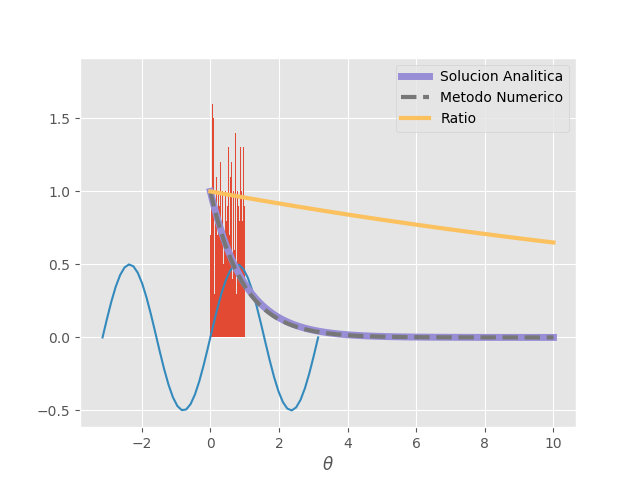

In [2]:
%matplotlib nbagg
import matplotlib.pyplot as plt
N=1000
import numpy as np
np.random.seed(0)
plt.style.use('ggplot')
R=np.random.rand(N)
plt.hist(R,bins=100,normed=True)
plt.show()

In [10]:
from numpy import pi
x = np.linspace(-pi,pi)
y = np.sin(x)*np.cos(x)
plt.plot(x,y)
plt.xlabel(r"$\theta$")
plt.legend([r'$\sin\theta\cos\theta$'])
plt.show()

In [11]:
dt,tmin,tmax=0.1,0.0,10.0
step=int((tmax-tmin)/dt)
t=np.linspace(tmin,tmax,step)
y=np.zeros(step)
ya=np.exp(-t)
plt.plot(t,ya,lw=5,label='Solucion Analitica')
y[0]=1.0
for i in range(step-1):
    y[i+1]=y[i]-dt*y[i]
plt.plot(t,y,ls='--',lw=3,label='Metodo Numerico')
plt.plot(t,y/ya,lw=3,label='Ratio')
plt.legend()
plt.show()

In [12]:
dim=2
nums=1000
R=np.zeros(dim)
V=np.zeros(dim)
Rs=np.zeros([dim,nums])
Vs=np.zeros([dim,nums])
Et=np.zeros(nums)
time=np.zeros(nums)

### El siguiente tramo , define lo necesario para usar Funcanimation y asi visualizar simulaciones con matplotlib

In [13]:
import matplotlib.animation as animation
def init():
    particles.set_data([], [])
    line.set_data([], [])
    title.set_text(r'')
    return particles,line,title

def animate(i):
    global R,V,Rs,Vs,t,Et
    V=V*(1-zeta/m*dt)-k/m*dt*R
    R=R+V*dt
    Rs[0:dim,i]=R
    Vs[0:dim,i]=V
    time[i]=i*dt
    Et[i]=0.5*m*np.linalg.norm(V)**2+0.5*k*np.linalg.norm(R)**2
    particles.set_data(R[0],R[1])
    line.set_data(Rs[0,0:i],Rs[1,0:i])
    title.set_text(r'$t = {0:.2f},E_T = {1:.3f}$'.format(i*dt,Et[i]))
    return particles ,line, title

# BORRADOR NATA SOY UN CRACK MARIA

<IPython.core.display.Javascript object>


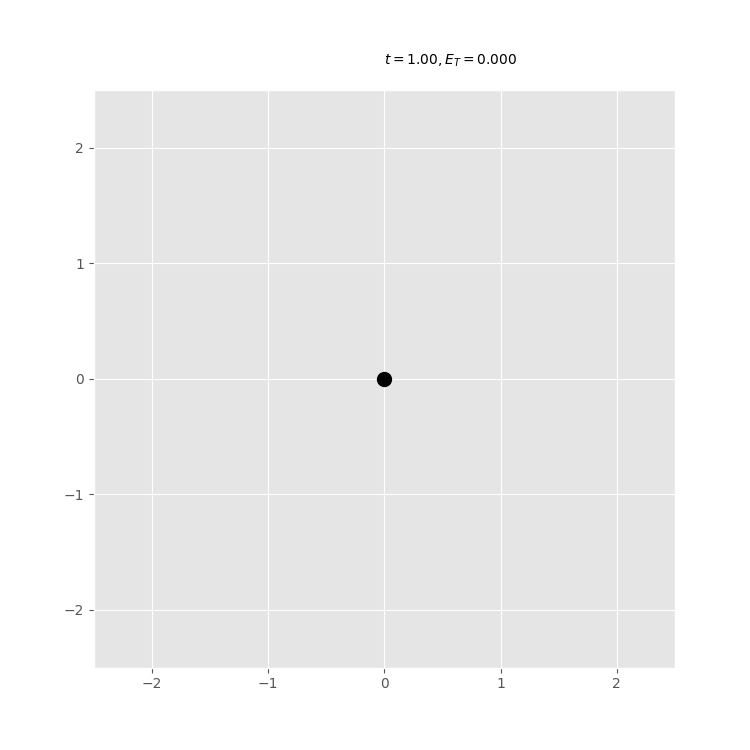

In [7]:
m,k,zeta=1.0,1.0,0.1
R[0],R[1]=1.0,1.0
V[0],V[1]=1.0,0.0
dt=0.1*np.sqrt(k/m)
box=5
fig,ax=plt.subplots(figsize=(7.5,7.5))
ax=plt.axes(xlim=(-box/2,box/2),ylim=(-box/2,box/2))
particles,=ax.plot([],[],'ko',ms=10)
line,=ax.plot([],[],lw=1)
title=ax.text(0.5,1.05,r'',transform=ax.transAxes,va='center')
anim=animation.FuncAnimation(fig,animate,init_func=init,frames=nums,interval=5,blit=True,repeat=False)


<IPython.core.display.Javascript object>


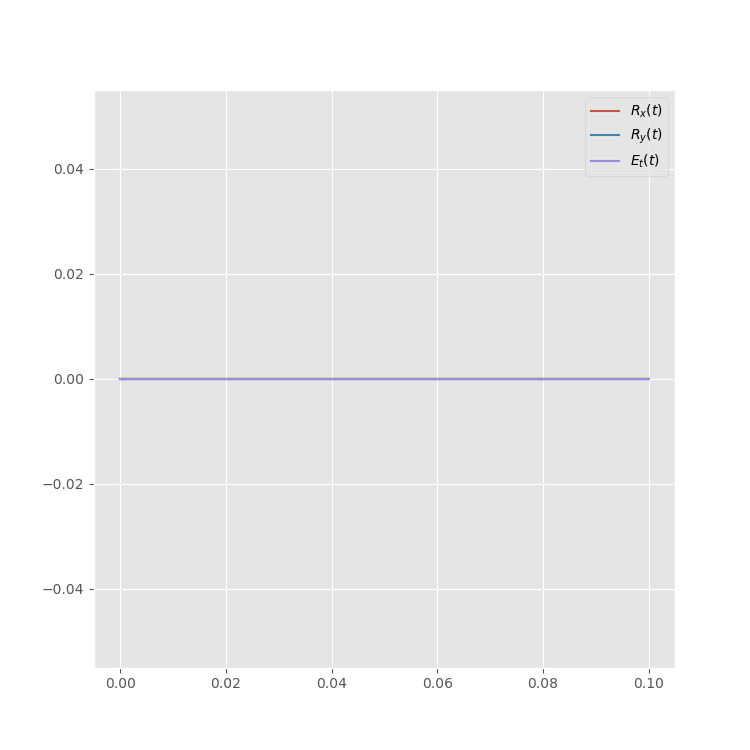

In [14]:
fig,ax=plt.subplots(figsize=(7.5,7.5))
plt.plot(time,Rs[0])
plt.plot(time,Rs[1])
plt.plot(time,Et)
ax.legend([r'$R_x(t)$',r'$R_y(t)$',r'$E_t(t)$'])
plt.show()

In [17]:
R1 = np.zeros(dim)
def animate_leapfrog(i): # define amination
    global R,V,F,Rs,Vs,time,Et
    R1=R
    V = (V*(1-zeta/2/m*dt)-k/m*dt*R)/(1+zeta*dt/2/m) # Leap-Frog Eq.(B17)
    R = R + V*dt # Leap-Frog Eq.(B18)
    Rs[0:dim,i]=R
    Vs[0:dim,i]=V
    time[i]=i*dt
    Et[i]=0.5*m*np.linalg.norm(V)**2+0.5*k*np.linalg.norm((R+R1)/2)**2 # Et is evaluated
    particles.set_data(R[0], R[1]) # current position
    line.set_data(Rs[0,0:i], Rs[1,0:i]) # add latest position Rs
    title.set_text(r"$t = {0:.2f},E_T = {1:.3f}$".format(i*dt,Et[i]))
    return particles,line,title


<IPython.core.display.Javascript object>


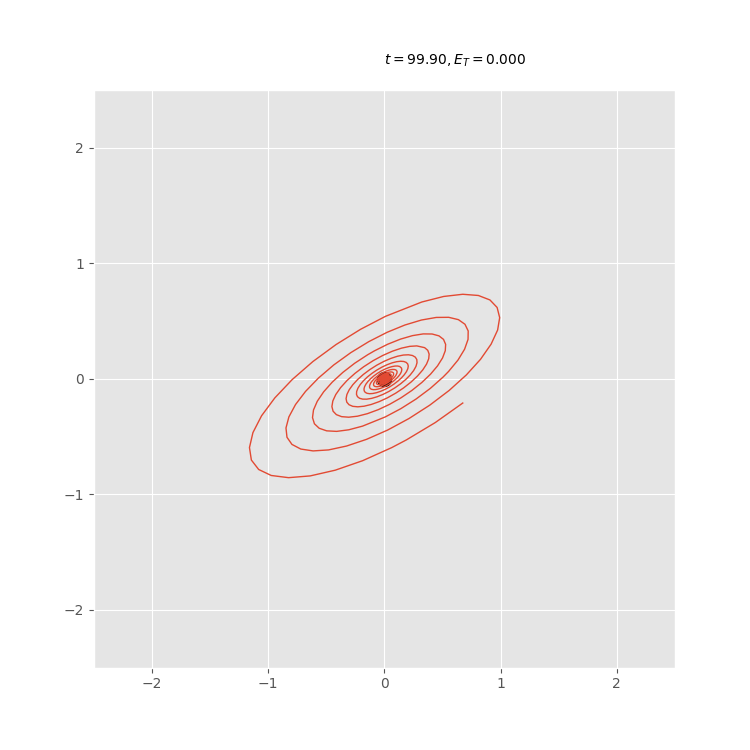

In [16]:
m,k,zeta=1.0,1.0,0.1
R[0],R[1]=1.0,1.0
V[0],V[1]=1.0,0.0
dt=0.1*np.sqrt(k/m)
box=5
fig,ax=plt.subplots(figsize=(7.5,7.5))
ax=plt.axes(xlim=(-box/2,box/2),ylim=(-box/2,box/2))
particles,=ax.plot([],[],'ko',ms=10)
line,=ax.plot([],[],lw=1)
title=ax.text(0.5,1.05,r'',transform=ax.transAxes,va='center')
anim=animation.FuncAnimation(fig,animate_leapfrog,init_func=init,frames=nums,interval=5,blit=True,repeat=False)

In [18]:
R1 = np.zeros(dim)
def animate_leapfrog_2(i): 
    global R,V,F,Rs,Vs,time,Et
    R1=R
    V = (V*(1-zeta/2/m*dt)-k/m*dt*np.linalg.norm(R)**2*R)/(1+zeta*dt/2/m) # Leap-Frog Eq.(B17)
    R = R + V*dt
    Rs[0:dim,i]=R
    Vs[0:dim,i]=V
    time[i]=i*dt
    Et[i]=0.5*m*np.linalg.norm(V)**2+0.5*k*np.linalg.norm((R+R1)/2)**4 # 
    particles.set_data(R[0], R[1]) 
    line.set_data(Rs[0,0:i], Rs[1,0:i]) 
    title.set_text(r"$t = {0:.2f},E_T = {1:.3f}$".format(i*dt,Et[i]))
    return particles,line,title

<IPython.core.display.Javascript object>


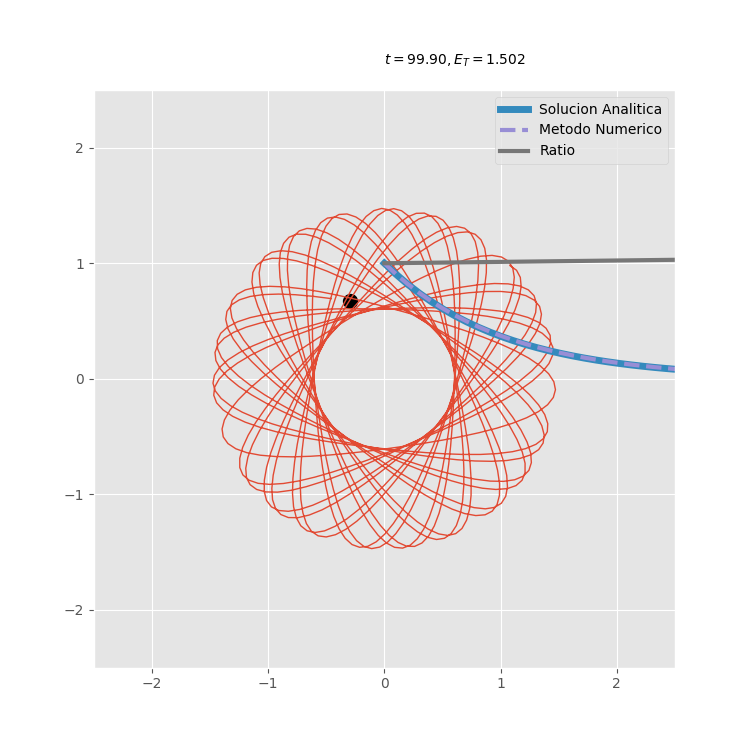

In [19]:
m,k,zeta=1.0,1.0,0
R[0],R[1]=1.0,1.0
V[0],V[1]=1.0,0.0
dt=0.1*np.sqrt(k/m)
box=5
fig,ax=plt.subplots(figsize=(7.5,7.5))
ax=plt.axes(xlim=(-box/2,box/2),ylim=(-box/2,box/2))
particles,=ax.plot([],[],'ko',ms=10)
line,=ax.plot([],[],lw=1)
title=ax.text(0.5,1.05,r'',transform=ax.transAxes,va='center')
anim=animation.FuncAnimation(fig,animate_leapfrog_2,init_func=init,frames=nums,interval=5,blit=True,repeat=False)

<IPython.core.display.Javascript object>


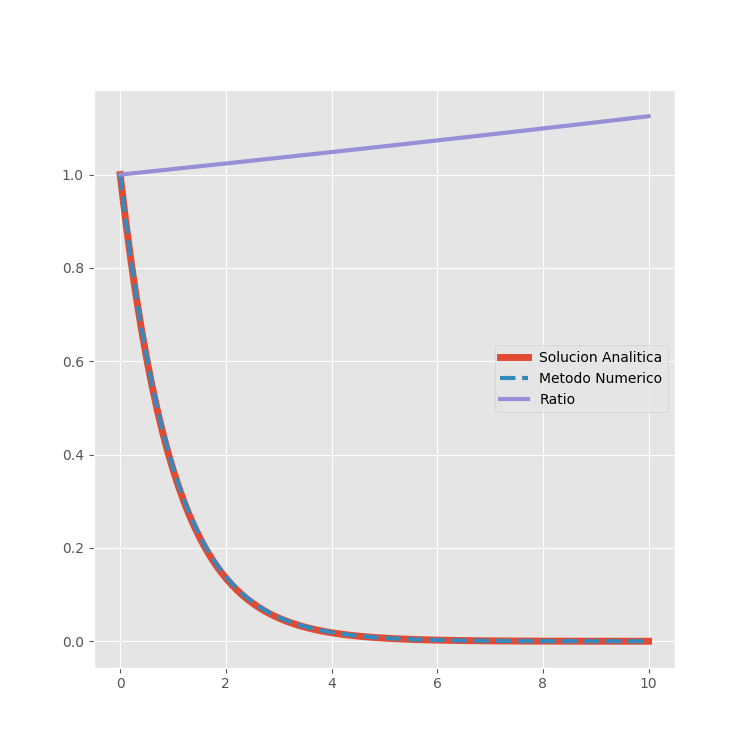

In [21]:
dt,tmin,tmax=0.1,0.0,10.0
step=int((tmax-tmin)/dt)
t=np.linspace(tmin,tmax,step)
y=np.zeros(step)
ya=np.exp(-t)
fig,ax=plt.subplots(figsize=(7.5,7.5))
plt.plot(t,ya,lw=5,label='Solucion Analitica')
y[0]=1.0
y1 = np.zeros(step)
for i in range(step-1):
    y1[i]=y[i]-0.5*dt*y[i]
    y[i+1]=y[i]-dt*y1[i]
plt.plot(t,y,ls='--',lw=3,label='Metodo Numerico')
plt.plot(t,y/ya,lw=3,label='Ratio')
plt.legend()
plt.show()


In [22]:
R1    = np.zeros(dim)
V1    = np.zeros(dim)
R2    = np.zeros(dim)
V2    = np.zeros(dim)
R3    = np.zeros(dim)
V3    = np.zeros(dim)
R4    = np.zeros(dim)
V4    = np.zeros(dim)
def animate_4th(i):
    global R,V,F,Rs,Vs,time,Et
    V1 = V - zeta/m*0.5*dt*V - k/m*0.5*dt*R
    R1 = R + V*0.5*dt
    V2 = V - zeta/m*0.5*dt*V1 - k/m*0.5*dt*R1
    R2 = R + V1*0.5*dt
    V3 = V - zeta/m*dt*V2 - k/m*dt*R2
    R3 = R + V2*dt
    V4 = V - (V+V1*2+V2*2+V3)/6.*zeta/m*dt - k/m*dt*(R+R1*2+R2*2+R3)/6.
    R4 = R + (V+V1*2+V2*2+V3)/6.*dt 
    R  = R4
    V  = V4
    Rs[0:dim,i]=R
    Vs[0:dim,i]=V
    time[i]=i*dt
    Et[i]=0.5*m*np.linalg.norm(V)**2+0.5*k*np.linalg.norm(R)**2
    particles.set_data(R[0], R[1])
    line.set_data(Rs[0,0:i], Rs[1,0:i])
    title.set_text(r"$t = {0:.2f},E_T = {1:.3f}$".format(i*dt,Et[i]))
    return particles,line,title

<IPython.core.display.Javascript object>


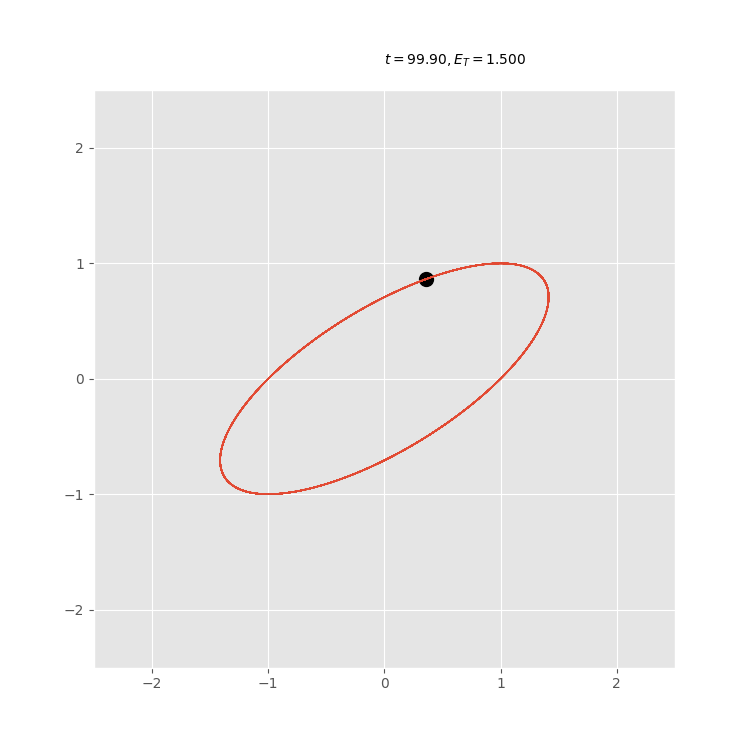

In [23]:
m,k,zeta=1.0,1.0,0
R[0],R[1]=1.0,1.0
V[0],V[1]=1.0,0.0
dt=0.1*np.sqrt(k/m)
box=5
fig,ax=plt.subplots(figsize=(7.5,7.5))
ax=plt.axes(xlim=(-box/2,box/2),ylim=(-box/2,box/2))
particles,=ax.plot([],[],'ko',ms=10)
line,=ax.plot([],[],lw=1)
title=ax.text(0.5,1.05,r'',transform=ax.transAxes,va='center')
anim=animation.FuncAnimation(fig,animate_4th,init_func=init,frames=nums,interval=5,blit=True,repeat=False)

<IPython.core.display.Javascript object>


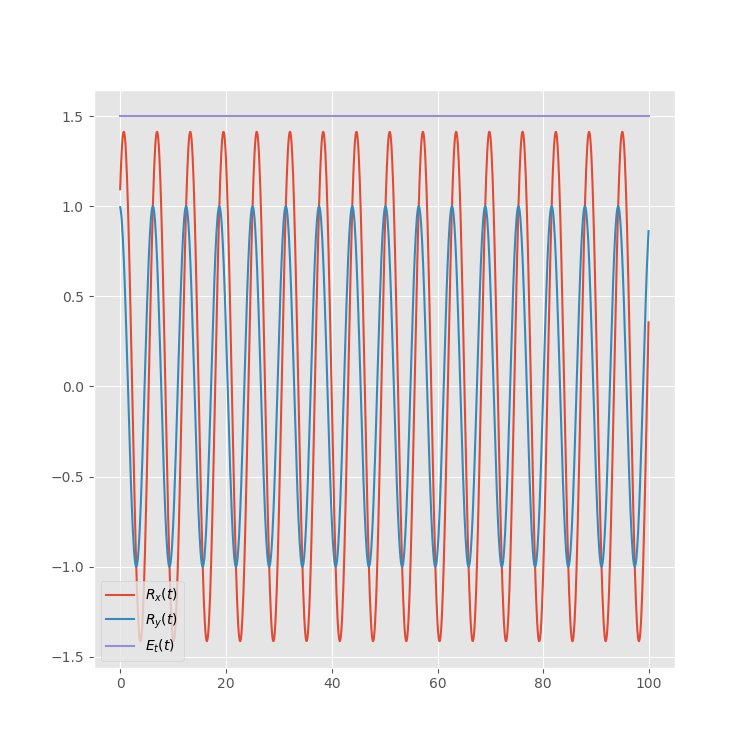

In [24]:
fig,ax=plt.subplots(figsize=(7.5,7.5))
plt.plot(time,Rs[0])
plt.plot(time,Rs[1])
plt.plot(time,Et)
ax.legend([r'$R_x(t)$',r'$R_y(t)$',r'$E_t(t)$'])
plt.show()